In [2]:
cd ../website

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website


In [3]:
import pandas as pd
import numpy as np
from numpy.linalg import svd, eig
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
%matplotlib inline
# Always make it pretty.
plt.style.use('seaborn-talk')
from recommender_model import *
import geopandas as gpd
from shapely.geometry import Point
from sklearn.decomposition import PCA
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
df = pd.read_csv('../data/df_with_features.csv', index_col=0)
mapping_df = pd.read_csv('../data/mapping_df.csv', index_col=0)

In [4]:
f1 = (0.5, 'Lovely ambiance')
f2 = (0, 'Nice for studying and working')
f3 = (0.2, 'High end coffee')
lat, lng = 47.612133, -122.335908

In [5]:
model = RecommenderModel(df, mapping_df)

In [6]:
recs = model.recommend(f1, f2, f3, lat, lng, r=1).to_dict('records')

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website/recommender_model.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  / normalizing_weight)
/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website/recommender_model.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)


In [7]:
df = model.df

In [8]:
mapped_df = model.mapped_df

In [9]:
cd ..

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter


In [10]:
seattle = gpd.GeoDataFrame.from_file('data/Neighborhoods/WGS84/Neighborhoods.shp')

In [11]:
seattle_points = df[['lng', 'lat']].apply(lambda row: Point(row['lng'], row['lat']), axis=1)
geo_seattle_points = gpd.GeoDataFrame({'geometry':seattle_points,
                                      'names':df['name']})
geo_seattle_points.crs = {'init': 'epsg:4326'}

In [12]:
W = df.drop(['name', 'lat', 'lng', 'address', 'shop_id'], axis=1)
mapping_df_columns = mapping_df.columns
plotting_df = pd.DataFrame(np.dot(W,mapping_df),
                               columns = mapping_df_columns)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

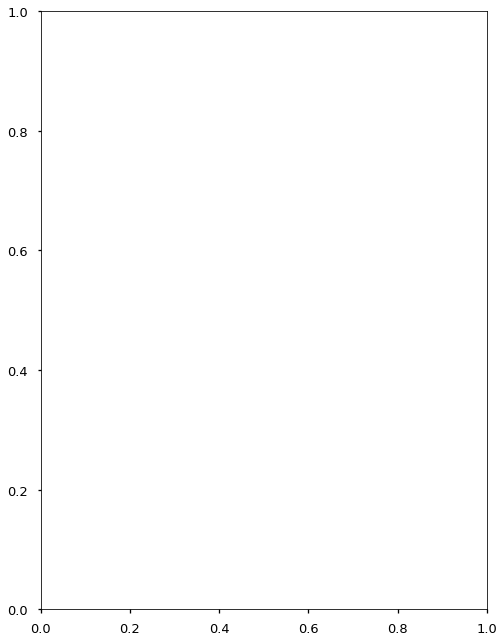

In [72]:
image_path = get_sample_data('/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/images/blue_map_pin.png')
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

fig, ax = plt.subplots(figsize=(8,11))
imscatter(mapped_df['lng'], mapped_df['lat'], image_path, ax=ax, zoom=0.01)
ax.set_facecolor('white')
ax.axis('off')
_=plt.show()

In [106]:
land_color = '#EB7BFF'
dot_color = '#78B232'

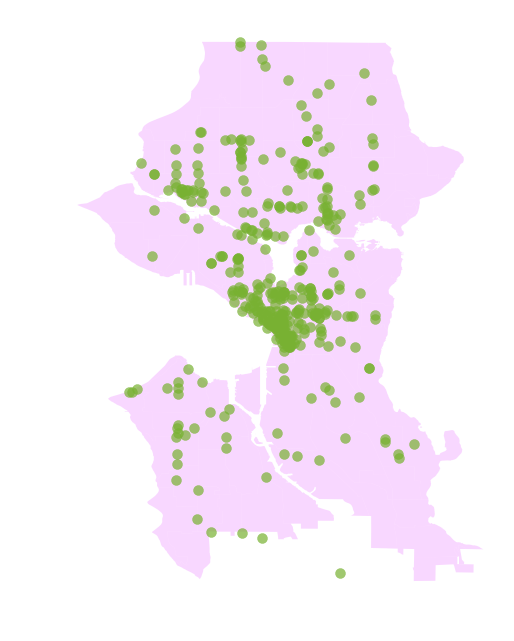

In [108]:
image_path = get_sample_data('/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/images/blue_map_pin.png')
fig, ax = plt.subplots(figsize=(8,11))
seattle.plot(ax=ax, color=land_color, alpha=0.3)
ax.scatter(mapped_df['lng'], mapped_df['lat'], s=100, alpha=0.7, color=dot_color)
ax.set_facecolor('white')
ax.axis('off')
_=ax.plot()
# plt.savefig('images/all_shops_in_seattle.png')

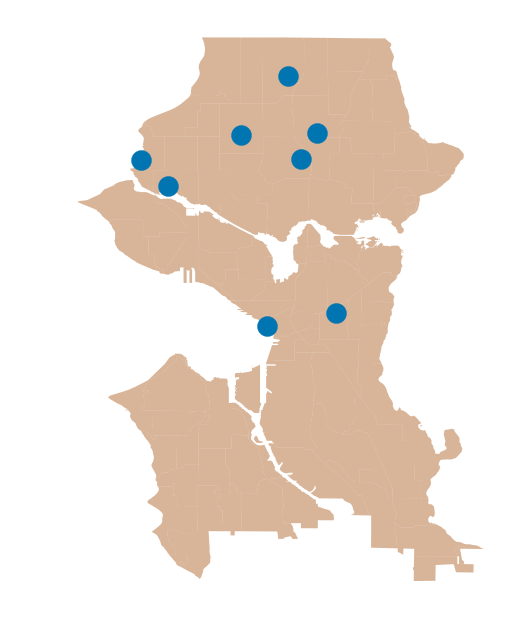

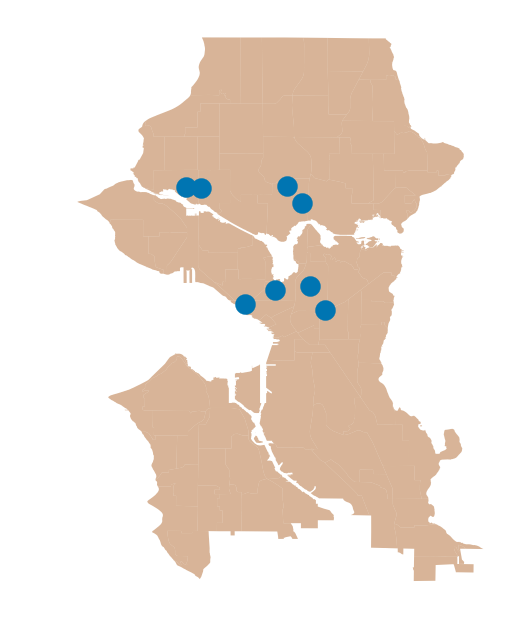

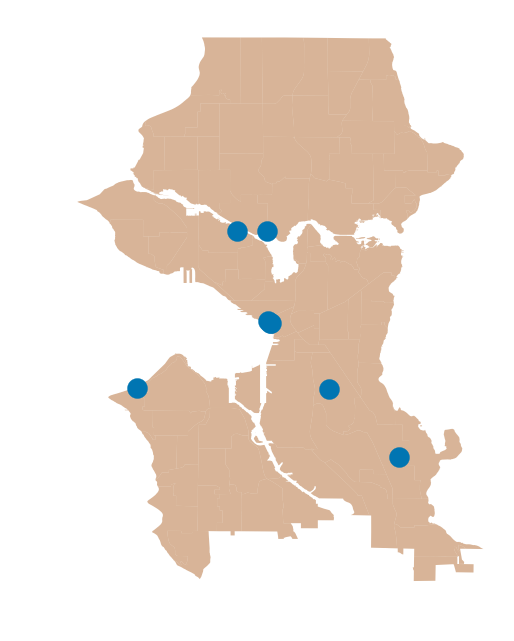

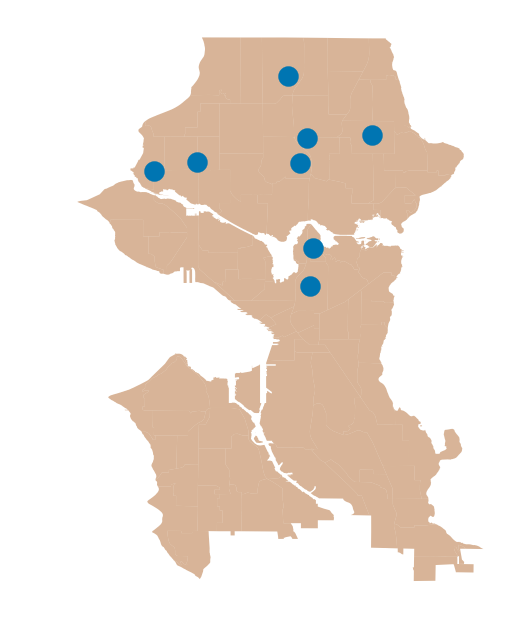

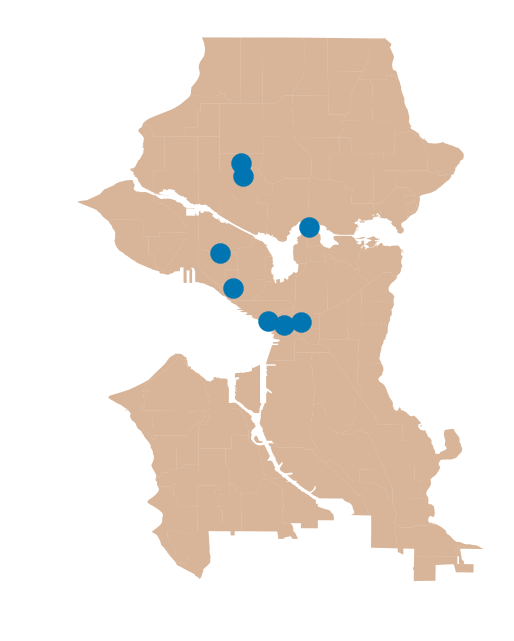

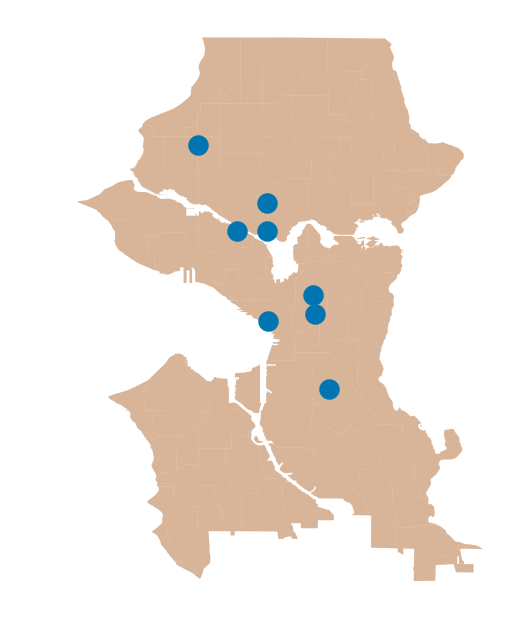

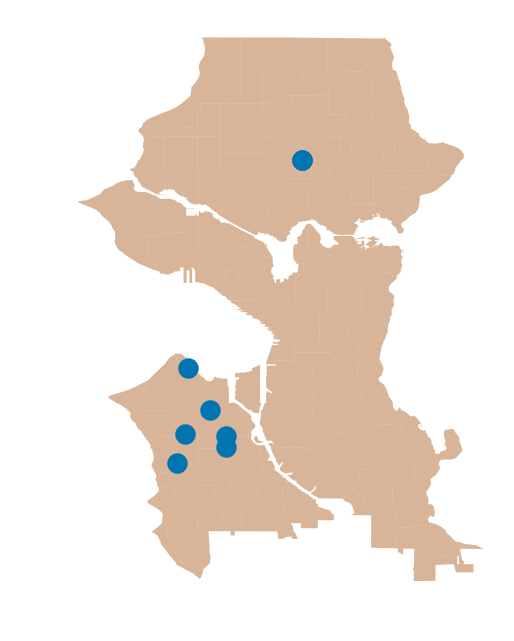

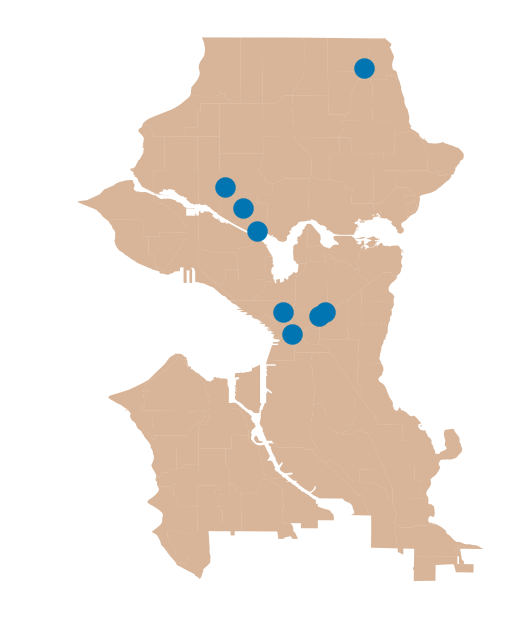

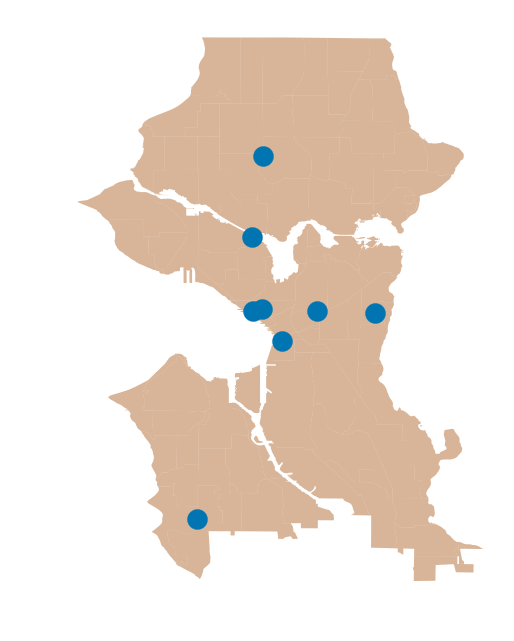

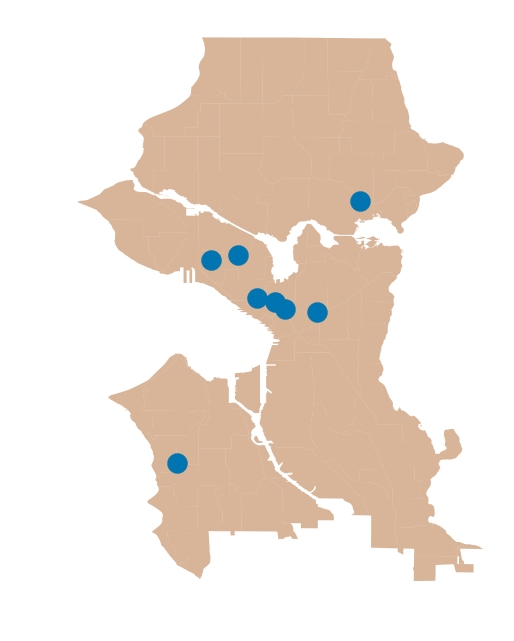

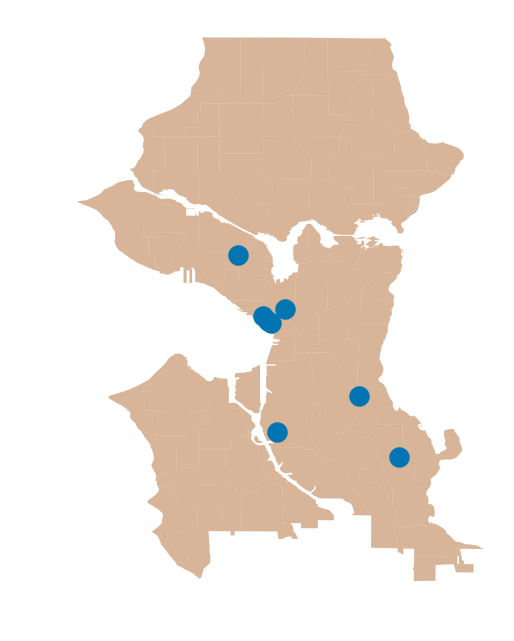

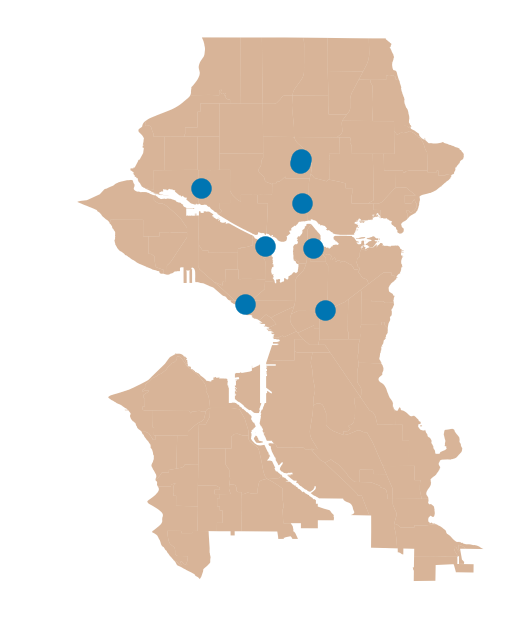

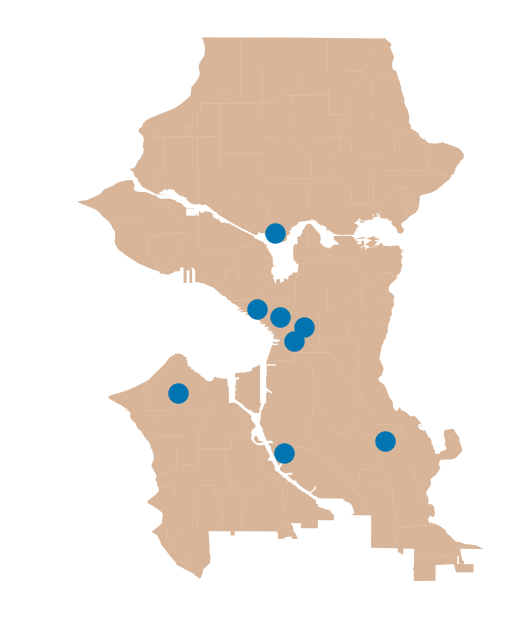

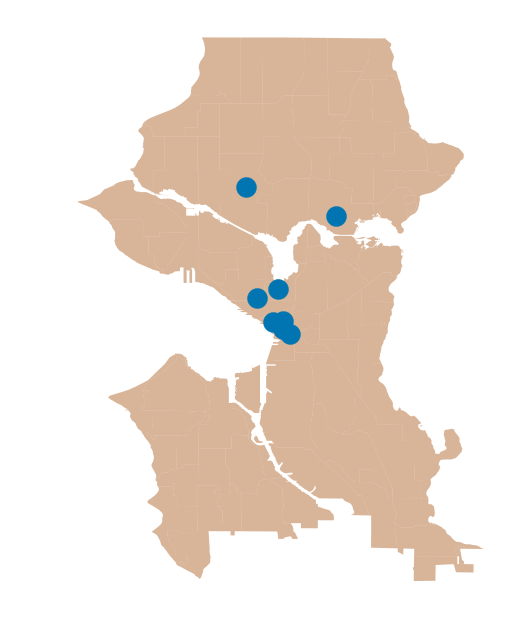

In [27]:
for feature in plotting_df.columns:
    fig, ax = plt.subplots(figsize=(8,11))
    seattle.plot(ax=ax, color=land_color, alpha=0.5)
    perc = 98
    df_over_perc = mapped_df[mapped_df[feature] > np.percentile(mapped_df[feature], perc)]
    ax.scatter(df_over_perc['lng'], df_over_perc['lat'], s=400, alpha=1, color=dot_color)
    ax.set_facecolor('white')
    #ax.set_title(feature)
    ax.axis('off')
    _=ax.plot()
#    plt.savefig('images/{}.png'.format(feature))

In [16]:
seattle_shops = gpd.tools.sjoin(geo_seattle_points, seattle, how='right', op='intersects')

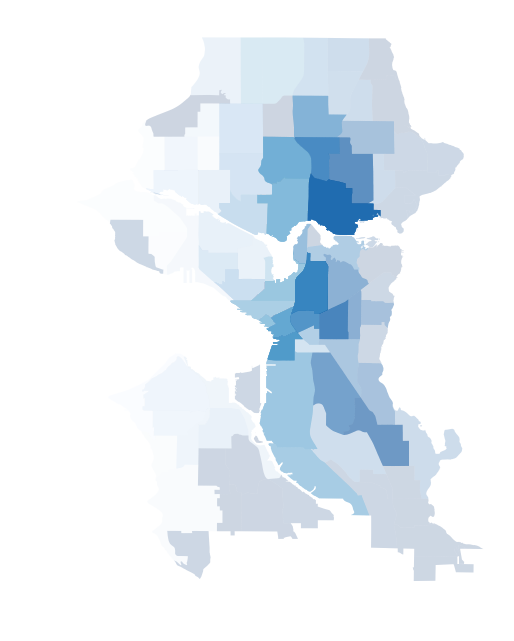

In [26]:
#How caffeinated a neighborhood is
fig, ax = plt.subplots(figsize=(8,11))
seattle_shops.plot(ax=ax, cmap='Blues', alpha=0.2)
ax.set_facecolor('white')
ax.axis('off')
_=ax.plot()
#plt.savefig('images/coffee_density.png')

### Playing with PCA

In [17]:
#Features to compare
f1 = 'Fun for families'
f2 = 'Quick in and out'

In [24]:
pca_df = mapped_df[['Fun for families',
       'Nice for studying and working', 'Lovely ambiance',
       'Hidden neighborhood spot', 'Tasty pastries', 'Nightlife',
       'Exceptional service', 'High end coffee', 'Breakfast bites',
       'Quick in and out', 'Perfect for people watching', 'Cozy and comfy',
       'Lunch and snacks', 'Bustling and busy']]

In [18]:
X = mapped_df[[f1, f2]]

In [26]:
pcd = PCA(2).fit(pca_df.values)
shops_reduced = np.dot(pca_df.values, pcd.components_.T)

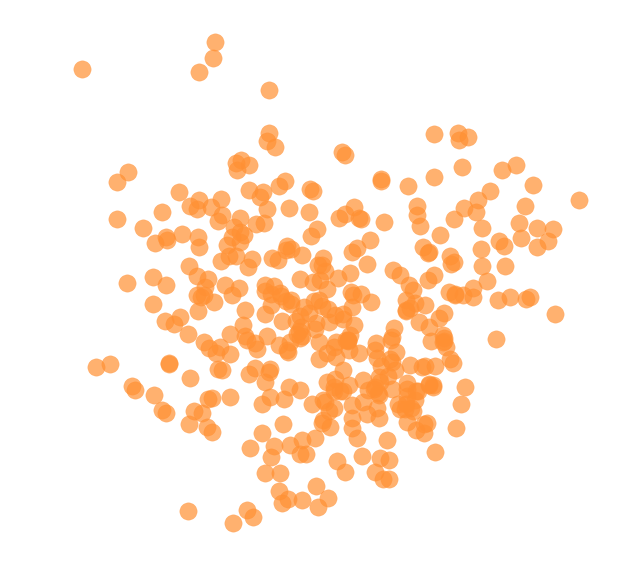

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(shops_reduced[:, 0], shops_reduced[:, 1], alpha=0.7, s=300, c='#FF9033')
ax.set_facecolor('white')
ax.axis('off')
_=ax.plot()
#plt.savefig('images/svd_all_shops.png')

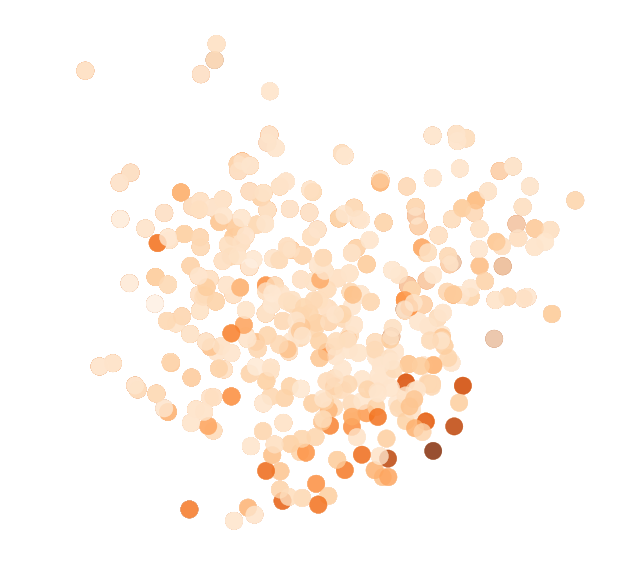

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
for feature in pca_df.columns:
    ax.scatter(shops_reduced[:, 0], shops_reduced[:, 1], alpha=0.8, s=300, c=pca_df[feature], cmap='Oranges')
    ax.set_facecolor('white')
    ax.axis('off')
    _=ax.plot()
#     plt.savefig('images/svd_{}.png'.format(feature))